In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker  # Ensure ticker is imported

# Load datasets
pikan_data = np.load('./data/2d_helmholtz_pikan_nx200_ny200_[2, 9, 9, 1].npy', allow_pickle=True).item()
spikan_data = np.load('./data/2d_helmholtz_spikan_nx200_ny200_[1, 5, 5, 1].npy', allow_pickle=True).item()


# Configure global font settings for consistency
plt.rcParams.update({
#     'font.family': 'serif',      # Use a serif font for all text
    'font.size': 12,               # Base font size
    'axes.titlesize': 14,          # Font size for titles
    'axes.labelsize': 12,          # Font size for axis labels
    'xtick.labelsize': 10,         # Font size for x-tick labels
    'ytick.labelsize': 10,         # Font size for y-tick labels
    'legend.fontsize': 12,         # Font size for legends
})

# Define exact solution
def exact_solution(x, y, a1, a2):
    return np.sin(a1 * np.pi * x) * np.sin(a2 * np.pi * y)

def set_tick_format(ax, cbar, decimals=2):
    formatter = ticker.FormatStrFormatter(f'%.{decimals}f')
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    cbar.ax.yaxis.set_major_formatter(formatter)




/tmp/ipykernel_2266/1139163192.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


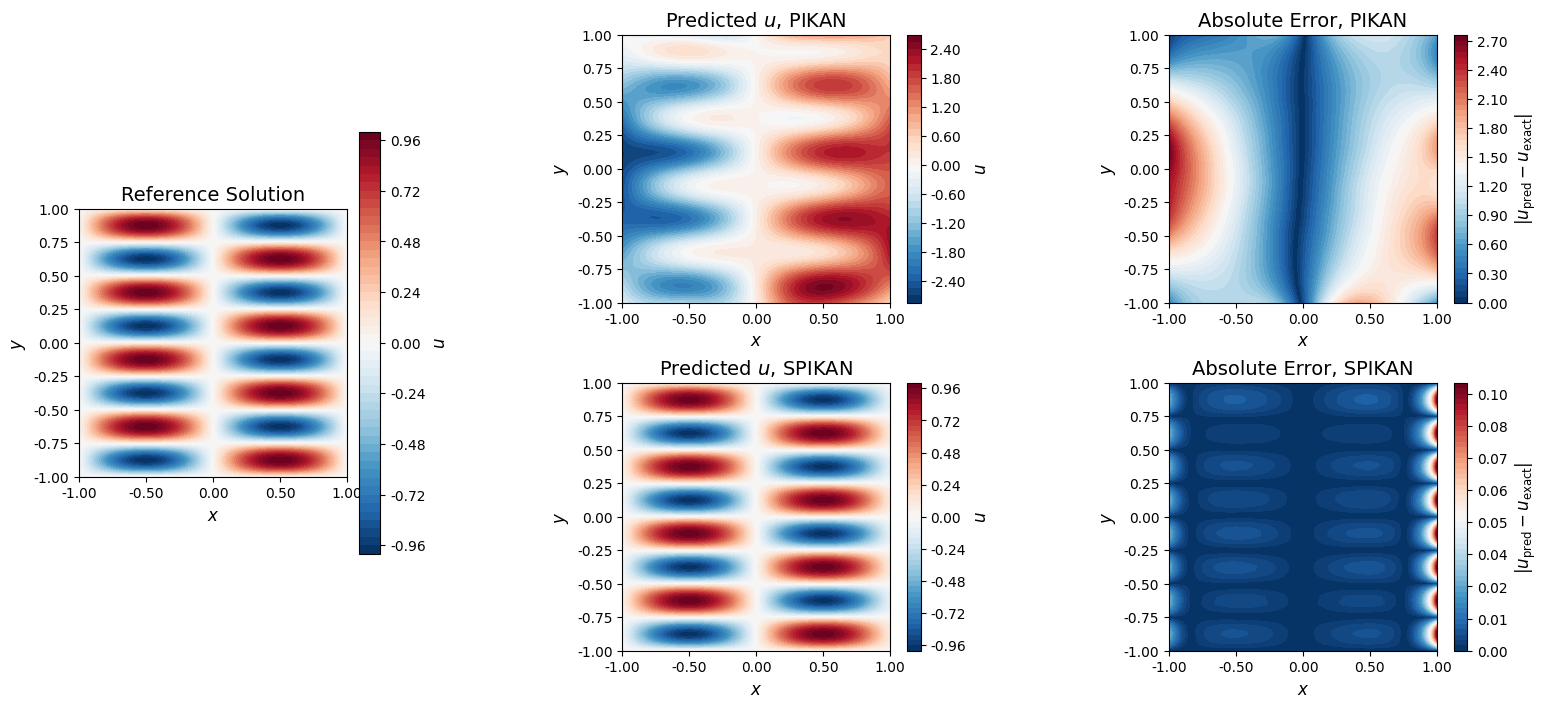

In [7]:
# Create meshgrid for plotting
X, Y = np.meshgrid(pikan_data['x'], pikan_data['y'])
u_exact = exact_solution(X, Y, a1=1.0, a2=4.0)

# Compute errors
pikan_error = np.abs(pikan_data['u'] - u_exact)
spikan_error = np.abs(spikan_data['u'] - u_exact)

# Create figure with updated layout
fig = plt.figure(figsize=(18, 8))  # Increased width for 3 columns
gs = gridspec.GridSpec(2, 3, width_ratios=[0.7, 1, 1], wspace=0.3, hspace=0.3)

# Assign subplots
ax_reference = plt.subplot(gs[:, 0])          # Reference solution spanning both rows
ax_pikan_pred = plt.subplot(gs[0, 1])         # PIKAN Predicted
ax_pikan_error = plt.subplot(gs[0, 2])        # PIKAN Error
ax_spikan_pred = plt.subplot(gs[1, 1])        # SPIKAN Predicted
ax_spikan_error = plt.subplot(gs[1, 2])       # SPIKAN Error

# Plot Reference solution
im_reference = ax_reference.contourf(X, Y, u_exact, 
                                    levels=50, cmap='RdBu_r', vmin=-1, vmax=1)
# Create colorbar
cbar_reference = plt.colorbar(im_reference, ax=ax_reference, fraction=0.07, pad=0.04)
cbar_reference.set_label(r'$u$')
ax_reference.set_title(r'Reference Solution')
ax_reference.set_aspect('equal')  # Ensures equal scaling on both axes
ax_reference.set_xlim(-1, 1)
ax_reference.set_ylim(-1, 1)
ax_reference.set_xlabel(r'$x$')
ax_reference.set_ylabel(r'$y$')

# Apply consistent tick formatting
set_tick_format(ax_reference, cbar_reference, decimals=2)

# Plot PIKAN Predicted
im_pikan = ax_pikan_pred.contourf(X, Y, pikan_data['u'], 
                                 levels=50, cmap='RdBu_r')
cbar_pikan = plt.colorbar(im_pikan, ax=ax_pikan_pred, fraction=0.046, pad=0.04)
cbar_pikan.set_label(r'$u$')
ax_pikan_pred.set_title(r'Predicted $u$, PIKAN')
ax_pikan_pred.set_aspect('equal')
ax_pikan_pred.set_xlim(-1, 1)
ax_pikan_pred.set_ylim(-1, 1)
ax_pikan_pred.set_xlabel(r'$x$')
ax_pikan_pred.set_ylabel(r'$y$')

# Apply consistent tick formatting
set_tick_format(ax_pikan_pred, cbar_pikan, decimals=2)

# Plot PIKAN Error
im_pikan_err = ax_pikan_error.contourf(X, Y, pikan_error, 
                                     levels=50, cmap='RdBu_r')
cbar_pikan_err = plt.colorbar(im_pikan_err, ax=ax_pikan_error, fraction=0.046, pad=0.04)
cbar_pikan_err.set_label(r'$|u_{\text{pred}} - u_{\text{exact}}|$')
ax_pikan_error.set_title(r'Absolute Error, PIKAN')
ax_pikan_error.set_aspect('equal')
ax_pikan_error.set_xlim(-1, 1)
ax_pikan_error.set_ylim(-1, 1)
ax_pikan_error.set_xlabel(r'$x$')
ax_pikan_error.set_ylabel(r'$y$')

# Apply consistent tick formatting
set_tick_format(ax_pikan_error, cbar_pikan_err, decimals=2)

# Plot SPIKAN Predicted
im_spikan = ax_spikan_pred.contourf(X, Y, spikan_data['u'], 
                                   levels=50, cmap='RdBu_r', vmin=-1, vmax=1)
cbar_spikan = plt.colorbar(im_spikan, ax=ax_spikan_pred, fraction=0.046, pad=0.04)
cbar_spikan.set_label(r'$u$')
ax_spikan_pred.set_title(r'Predicted $u$, SPIKAN')
ax_spikan_pred.set_aspect('equal')
ax_spikan_pred.set_xlim(-1, 1)
ax_spikan_pred.set_ylim(-1, 1)
ax_spikan_pred.set_xlabel(r'$x$')
ax_spikan_pred.set_ylabel(r'$y$')

# Apply consistent tick formatting
set_tick_format(ax_spikan_pred, cbar_spikan, decimals=2)

# Plot SPIKAN Error
im_spikan_err = ax_spikan_error.contourf(X, Y, spikan_error, 
                                       levels=50, cmap='RdBu_r')
cbar_spikan_err = plt.colorbar(im_spikan_err, ax=ax_spikan_error, fraction=0.046, pad=0.04)
cbar_spikan_err.set_label(r'$|u_{\text{pred}} - u_{\text{exact}}|$')
ax_spikan_error.set_title(r'Absolute Error, SPIKAN')
ax_spikan_error.set_aspect('equal')
ax_spikan_error.set_xlim(-1, 1)
ax_spikan_error.set_ylim(-1, 1)
ax_spikan_error.set_xlabel(r'$x$')
ax_spikan_error.set_ylabel(r'$y$')

# Apply consistent tick formatting
set_tick_format(ax_spikan_error, cbar_spikan_err, decimals=2)

# Adjust layout and display the plot
plt.tight_layout()

plt.savefig('./results/comparison_helmholtz2d_2.png', dpi=600,  bbox_inches='tight')
plt.show()


In [8]:
# Print error statistics
print("PIKAN Error Statistics:")
print(f"Mean Absolute Error: {np.mean(pikan_error):.2e}")
print(f"Max Absolute Error: {np.max(pikan_error):.2e}")
print(f"L2 Error %: {100 * np.sqrt(np.mean(pikan_error**2))/np.sqrt(np.mean(u_exact**2)):.2f}%\n")

print("SPIKAN Error Statistics:")
print(f"Mean Absolute Error: {np.mean(spikan_error):.2e}")
print(f"Max Absolute Error: {np.max(spikan_error):.2e}")
print(f"L2 Error %: {100 * np.sqrt(np.mean(spikan_error**2))/np.sqrt(np.mean(u_exact**2)):.2f}%")


PIKAN Error Statistics:
Mean Absolute Error: 9.94e-01
Max Absolute Error: 2.72e+00
L2 Error %: 228.84%

SPIKAN Error Statistics:
Mean Absolute Error: 5.08e-03
Max Absolute Error: 9.88e-02
L2 Error %: 2.20%
